Dataset path: /kaggle/input/breast-cancer-wisconsin-data
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ..

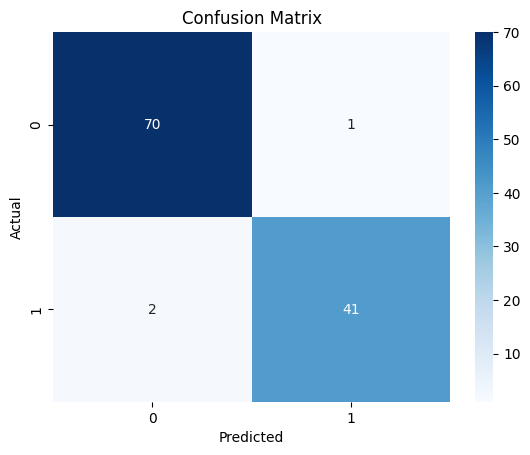

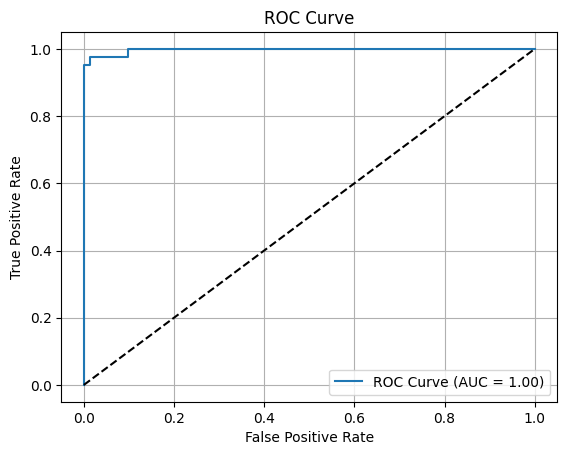


Custom Threshold (0.3) Precision: 0.9130434782608695
Custom Threshold (0.3) Recall: 0.9767441860465116


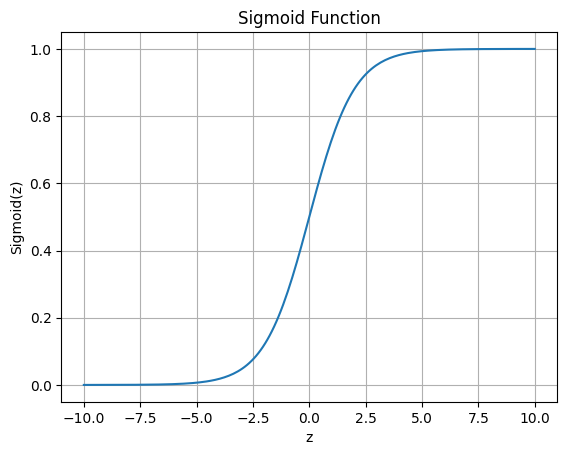

In [3]:
# 📦 Task 4: Logistic Regression on Breast Cancer Wisconsin Dataset

# 🧰 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, roc_auc_score, roc_curve
)

# 📥 Install and import kagglehub
!pip install -q kagglehub
import kagglehub

# 📦 Download the dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Dataset path:", path)

# 🗃 Load the data
import os
df = pd.read_csv(os.path.join(path, "data.csv"))

# 🔎 Basic info
print(df.head())
print(df.info())

# 🧼 Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# 🎯 Encode target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# ✅ Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 📊 Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🤖 Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔍 Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 📈 Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 📍 Threshold tuning example
custom_threshold = 0.3
y_custom = (y_prob >= custom_threshold).astype(int)
print("\nCustom Threshold (0.3) Precision:", precision_score(y_test, y_custom))
print("Custom Threshold (0.3) Recall:", recall_score(y_test, y_custom))

# 🧠 Explain Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid function
z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()
